# Task 5 At The Spark Foundation Intern

### BI Reprot : 
https://app.powerbi.com/reportEmbed?reportId=05eaab75-ce18-42fd-9870-b8413fadd4a8&autoAuth=true&ctid=6845d6ca-1ec5-4c0e-9e9d-34130ce0a0b8

### Import Helper Libraries 

In [400]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

In [102]:
warnings.filterwarnings('ignore')

In [132]:
sns.set_theme(context = 'notebook' , style = 'whitegrid'  , palette = 'Paired' , rc = {'figure.figsize' : (10 , 4)})

### Read The Two Datasets 

In [141]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

### Check Matches Info Dataset For Missing Values & DataTypes Representation

In [142]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### Feature With High Percentage Of Missing Records Will Drop (umpire3)

In [143]:
matches.isnull().mean()*100

id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

In [144]:
matches.drop(['umpire3'] , axis = 1 , inplace = True)

### Drop Missing Records With Low Percentage Of Missing 

In [145]:
matches.dropna(subset = ['city' , 'winner' , 'player_of_match' , 'umpire1' , 'umpire2'] , axis = 0 , inplace = True)

### Check Deliveries Info Dataset For Missing Values & DataTypes Representation

In [146]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Feature With High Percentage Of Missing Records Will Drop (player_dismissed , dismissal_kind , fielder)

In [147]:
deliveries.isnull().mean()*100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

In [148]:
deliveries.drop(['player_dismissed' , 'dismissal_kind' , 'fielder'] , axis = 1 , inplace = True)

### Join The Two Datasets (Inner Join) On Mathch_Id

In [149]:
df = pd.merge(left = matches , right = deliveries , how = 'inner' , left_on = 'id' , right_on = 'match_id')

In [150]:
df.drop(['match_id'] , axis = 1 , inplace = True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176506 entries, 0 to 176505
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               176506 non-null  int64 
 1   season           176506 non-null  int64 
 2   city             176506 non-null  object
 3   date             176506 non-null  object
 4   team1            176506 non-null  object
 5   team2            176506 non-null  object
 6   toss_winner      176506 non-null  object
 7   toss_decision    176506 non-null  object
 8   result           176506 non-null  object
 9   dl_applied       176506 non-null  int64 
 10  winner           176506 non-null  object
 11  win_by_runs      176506 non-null  int64 
 12  win_by_wickets   176506 non-null  int64 
 13  player_of_match  176506 non-null  object
 14  venue            176506 non-null  object
 15  umpire1          176506 non-null  object
 16  umpire2          176506 non-null  object
 17  inning    

### Doing Some Univariate Analysis To Understand Our Feature 

In [152]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs'],
      dtype='object')

In [153]:
sorted(df['season'].unique())

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

<AxesSubplot:xlabel='season', ylabel='count'>

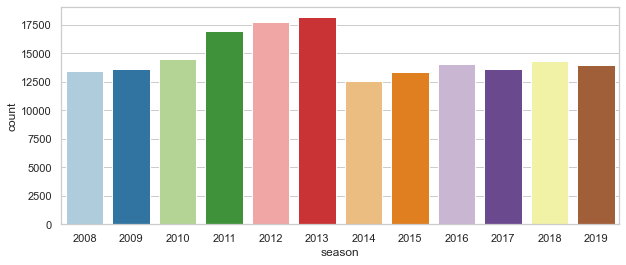

In [154]:
sns.countplot(df['season'])

In [155]:
sorted(df['city'].unique())

['Abu Dhabi',
 'Ahmedabad',
 'Bangalore',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chandigarh',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kanpur',
 'Kimberley',
 'Kochi',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam']

In [156]:
df['date']

0         2017-04-05
1         2017-04-05
2         2017-04-05
3         2017-04-05
4         2017-04-05
             ...    
176501      12/05/19
176502      12/05/19
176503      12/05/19
176504      12/05/19
176505      12/05/19
Name: date, Length: 176506, dtype: object

In [157]:
df['date'] = pd.to_datetime(df['date'] , errors = 'coerce')

In [158]:
df['date']

0        2017-04-05
1        2017-04-05
2        2017-04-05
3        2017-04-05
4        2017-04-05
            ...    
176501   2019-12-05
176502   2019-12-05
176503   2019-12-05
176504   2019-12-05
176505   2019-12-05
Name: date, Length: 176506, dtype: datetime64[ns]

In [159]:
sorted(df['team1'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [160]:
sorted(df['team2'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [161]:
sorted(df['toss_winner'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

<AxesSubplot:xlabel='count', ylabel='toss_winner'>

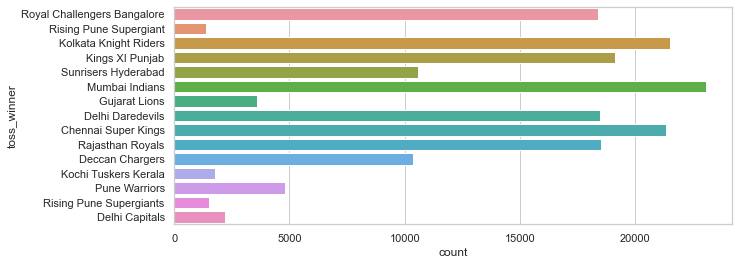

In [162]:
sns.countplot( y = df['toss_winner'])

In [163]:
df['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

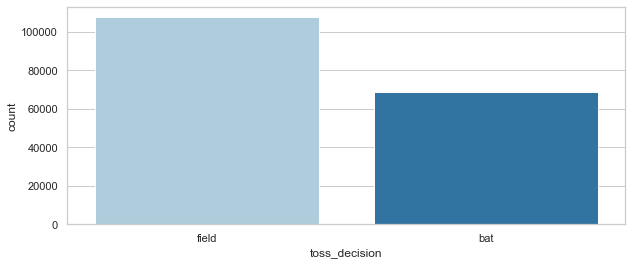

In [164]:
sns.countplot(df['toss_decision'])

In [165]:
df['result'].unique()

array(['normal', 'tie'], dtype=object)

<AxesSubplot:xlabel='result', ylabel='count'>

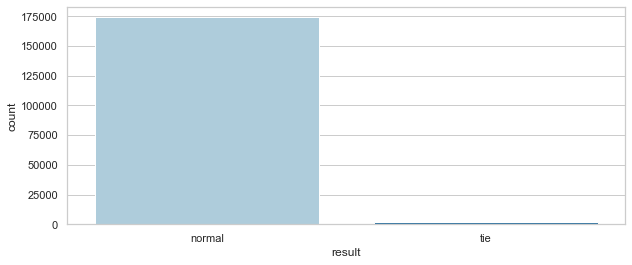

In [166]:
sns.countplot(df['result'])

In [170]:
df['dl_applied'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='dl_applied', ylabel='count'>

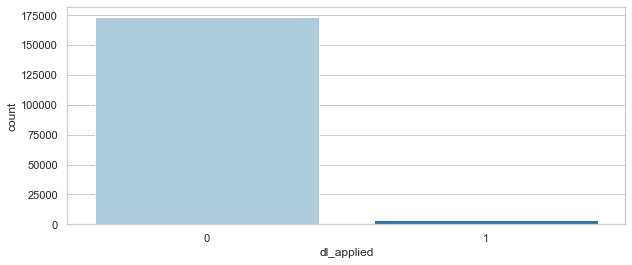

In [171]:
sns.countplot(df['dl_applied'])

In [176]:
sorted(df['winner'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [181]:
df['win_by_runs'].describe()

count    176506.000000
mean         13.541562
std          23.391111
min           0.000000
25%           0.000000
50%           0.000000
75%          19.000000
max         146.000000
Name: win_by_runs, dtype: float64

<AxesSubplot:xlabel='win_by_runs', ylabel='Density'>

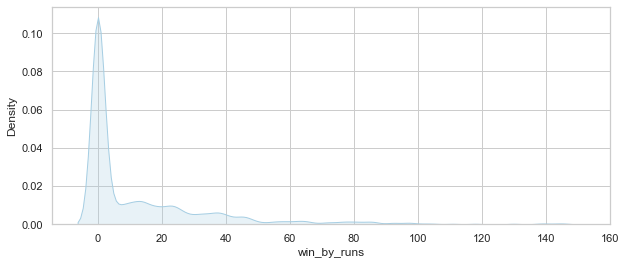

In [183]:
sns.kdeplot(df['win_by_runs'] , shade = True)

In [186]:
df['win_by_wickets'].describe()

count    176506.000000
mean          3.275288
std           3.352514
min           0.000000
25%           0.000000
50%           3.000000
75%           6.000000
max          10.000000
Name: win_by_wickets, dtype: float64

<AxesSubplot:xlabel='win_by_wickets', ylabel='Density'>

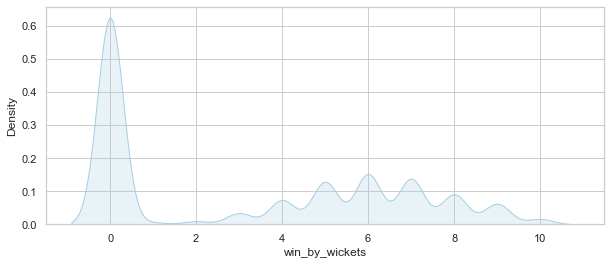

In [188]:
sns.kdeplot(df['win_by_wickets'] , shade = True)

In [191]:
sorted(df['player_of_match'].unique())

['A Chandila',
 'A Joseph',
 'A Kumble',
 'A Mishra',
 'A Nehra',
 'A Singh',
 'A Symonds',
 'A Zampa',
 'AA Jhunjhunwala',
 'AB Dinda',
 'AB de Villiers',
 'AC Gilchrist',
 'AC Voges',
 'AD Mascarenhas',
 'AD Mathews',
 'AD Russell',
 'AJ Finch',
 'AJ Tye',
 'AM Rahane',
 'AP Tare',
 'AR Patel',
 'AS Rajpoot',
 'AS Yadav',
 'AT Rayudu',
 'Azhar Mahmood',
 'B Kumar',
 'B Lee',
 'B Stanlake',
 'BA Bhatt',
 'BA Stokes',
 'BB McCullum',
 'BCJ Cutting',
 'BJ Hodge',
 'BW Hilfenhaus',
 'CA Lynn',
 'CH Gayle',
 'CH Morris',
 'CJ Anderson',
 'CL White',
 'CR Brathwaite',
 'CRD Fernando',
 'DA Miller',
 'DA Warner',
 'DE Bollinger',
 'DJ Bravo',
 'DJ Hooda',
 'DJ Hussey',
 'DJG Sammy',
 'DL Chahar',
 'DL Vettori',
 'DP Nannes',
 'DPMD Jayawardene',
 'DR Smith',
 'DW Steyn',
 'EJG Morgan',
 'F du Plessis',
 'G Gambhir',
 'GC Smith',
 'GD McGrath',
 'GH Vihari',
 'GJ Bailey',
 'GJ Maxwell',
 'H Gurney',
 'HH Gibbs',
 'HH Pandya',
 'HM Amla',
 'HV Patel',
 'Harbhajan Singh',
 'Harmeet Singh',
 'I

In [194]:
sorted(df['venue'].unique())

['ACA-VDCA Stadium',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Eden Gardens',
 'Feroz Shah Kotla',
 'Feroz Shah Kotla Ground',
 'Green Park',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'IS Bindra Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'M. A. Chidambaram Stadium',
 'M. Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'Nehru Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association IS Bindra Stadium, Mohali',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Rajiv Gandhi Intl. Cricket Stadium',
 'Sardar Patel Stadium, Motera',
 'Saurashtra Cricket Association Stadium',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International

In [197]:
sorted(df['umpire1'].unique())

['A Deshmukh',
 'A Nand Kishore',
 'A Nanda Kishore',
 'AK Chaudhary',
 'AM Saheba',
 'AV Jayaprakash',
 'AY Dandekar',
 'Aleem Dar',
 'Anil Chaudhary',
 'Anil Dandekar',
 'Asad Rauf',
 'BF Bowden',
 'BG Jerling',
 'BNJ Oxenford',
 'BR Doctrove',
 'Bruce Oxenford',
 'C Shamshuddin',
 'CB Gaffaney',
 'CK Nandan',
 'Chris Gaffaney',
 'DJ Harper',
 'GAV Baxter',
 'HDPK Dharmasena',
 'IL Howell',
 'Ian Gould',
 'JD Cloete',
 'K Ananthapadmanabhan',
 'K Bharatan',
 'K Hariharan',
 'K Srinath',
 'KN Ananthapadmanabhan',
 'Kumar Dharmasena',
 'M Erasmus',
 'MR Benson',
 'Marais Erasmus',
 'NJ Llong',
 'Nanda Kishore',
 'Nigel Llong',
 'Nitin Menon',
 'O Nandan',
 'PG Pathak',
 'PR Reiffel',
 'RE Koertzen',
 'RK Illingworth',
 'RM Deshpande',
 'Rod Tucker',
 'S Asnani',
 'S Das',
 'S Ravi',
 'SD Fry',
 'SJ Davis',
 'SJA Taufel',
 'SK Tarapore',
 'SL Shastri',
 'SS Hazare',
 'Sundaram Ravi',
 'Ulhas Gandhe',
 'VA Kulkarni',
 'Vineet Kulkarni',
 'YC Barde',
 'Yeshwant Barde']

In [202]:
sorted(df['umpire2'].unique())

['A Deshmukh',
 'A Nand Kishore',
 'A Nanda Kishore',
 'A.D Deshmukh',
 'AK Chaudhary',
 'AL Hill',
 'AM Saheba',
 'AV Jayaprakash',
 'Anil Chaudhary',
 'Anil Dandekar',
 'BG Jerling',
 'BNJ Oxenford',
 'BR Doctrove',
 'Bruce Oxenford',
 'C Shamshuddin',
 'CB Gaffaney',
 'CK Nandan',
 'Chris Gaffaney',
 'DJ Harper',
 'GA Pratapkumar',
 'HDPK Dharmasena',
 'I Shivram',
 'IL Howell',
 'Ian Gould',
 'JD Cloete',
 'K Ananthapadmanabhan',
 'K Hariharan',
 'K Srinath',
 'K Srinivasan',
 'KN Anantapadmanabhan',
 'KN Ananthapadmanabhan',
 'Kumar Dharmasena',
 'M Erasmus',
 'MR Benson',
 'NJ Llong',
 'Nand Kishore',
 'Nanda Kishore',
 'Nigel Llong',
 'Nitin Menon',
 'O Nandan',
 'PG Pathak',
 'PR Reiffel',
 'RB Tiffin',
 'RE Koertzen',
 'RJ Tucker',
 'RK Illingworth',
 'Rod Tucker',
 'S Asnani',
 'S Das',
 'S Ravi',
 'SD Fry',
 'SD Ranade',
 'SJ Davis',
 'SJA Taufel',
 'SK Tarapore',
 'SL Shastri',
 'SS Hazare',
 'Subroto Das',
 'TH Wijewardene',
 'Ulhas Gandhe',
 'VA Kulkarni',
 'VK Sharma',
 

In [204]:
df['inning'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

<AxesSubplot:xlabel='inning', ylabel='count'>

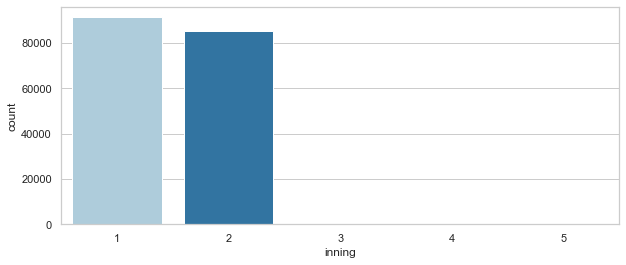

In [205]:
sns.countplot(df['inning'])

In [209]:
sorted(df['batting_team'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

<AxesSubplot:xlabel='count', ylabel='batting_team'>

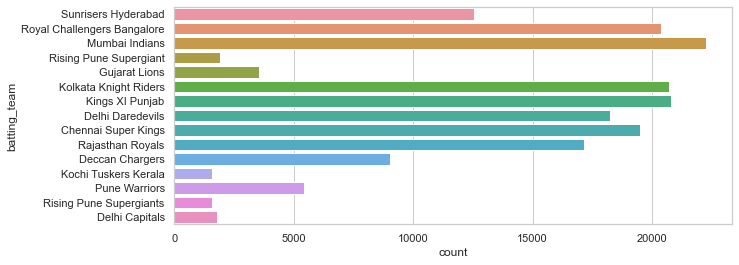

In [210]:
sns.countplot(y = df['batting_team'])

In [214]:
sorted(df['bowling_team'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [217]:
df['over'].describe()

count    176506.000000
mean         10.163536
std           5.676096
min           1.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: over, dtype: float64

<AxesSubplot:xlabel='over', ylabel='Density'>

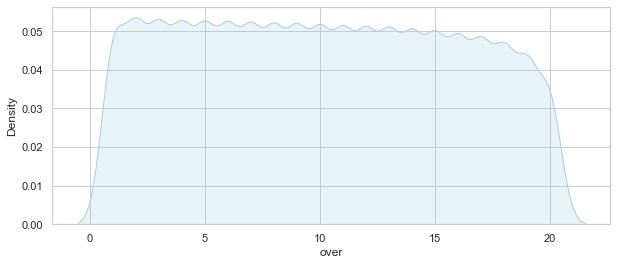

In [219]:
sns.kdeplot(df['over'] , shade =  True)

In [222]:
df['ball'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

<AxesSubplot:xlabel='ball', ylabel='count'>

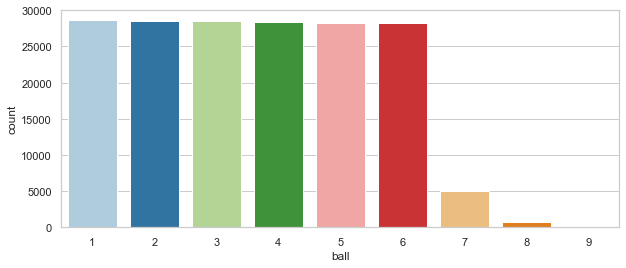

In [223]:
sns.countplot(df['ball'])

In [225]:
df['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woakes', 'SP Narine', 'Harbhajan Singh', 'Vishnu Vinod',
       'AB de Villiers', 'AP Tare', 'SW Billings', 'SV Samson', 'RR Pant',
       'CJ Anderson', 'CH Morris', 'F du Plessis', 'RA Tripathi',
       '

In [228]:
df['non_striker'].unique()

array(['S Dhawan', 'DA Warner', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'Mandeep Singh', 'CH Gayle', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'TS Mills', 'YS Chahal', 'A Choudhary', 'JC Buttler', 'PA Patel',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'MJ McClenaghan', 'MA Agarwal',
       'AM Rahane', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'BB McCullum',
       'JJ Roy', 'SK Raina', 'AJ Finch', 'KD Karthik', 'DR Smith',
       'CA Lynn', 'G Gambhir', 'MK Tiwary', 'DT Christian', 'R Bhatia',
       'M Vohra', 'HM Amla', 'WP Saha', 'AR Patel', 'GJ Maxwell',
       'DA Miller', 'DS Kulkarni', 'P Kumar', 'Basil Thampi', 'MK Pandey',
       'YK Pathan', 'SA Yadav', 'CR Woakes', 'SP Narine',
       'Harbhajan Singh', 'Vishnu Vinod', 'AB de Villiers', 'SW Billings',
       'AP Tare', 'SV Samson', 'RR Pant', 'CJ Anderson', 'CH Morris',
       'F du Plessis', 

In [230]:
df['bowler'].unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'B Stanlake',
       'Iqbal Abdulla', 'P Negi', 'S Nadeem', 'PJ Cummins', 'Z Khan',
       'CH Morris', 'CJ Anderson', 'A Mishra', 'Mustafizur Rahman',
       'UT Yadav', 'C de Grandhomme', 'I

In [232]:
df['is_super_over'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='is_super_over', ylabel='count'>

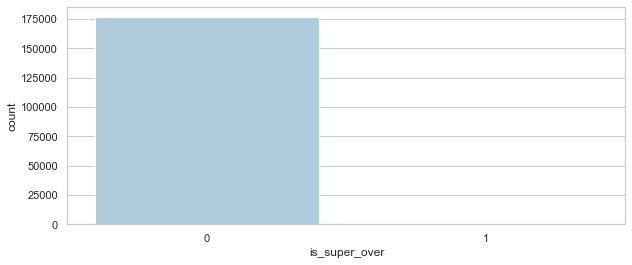

In [233]:
sns.countplot(df['is_super_over'])

In [235]:
df['wide_runs'].unique()

array([0, 2, 1, 5, 3, 4], dtype=int64)

<AxesSubplot:xlabel='wide_runs', ylabel='count'>

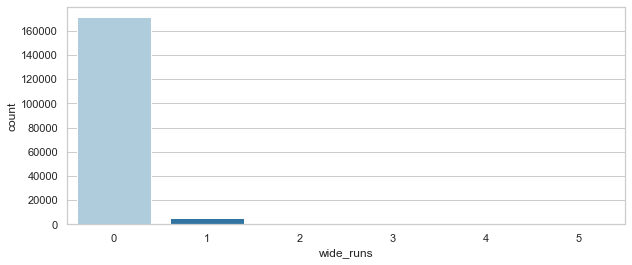

In [236]:
sns.countplot(df['wide_runs'])

In [238]:
df['bye_runs'].unique()

array([0, 1, 4, 2, 3], dtype=int64)

<AxesSubplot:xlabel='bye_runs', ylabel='count'>

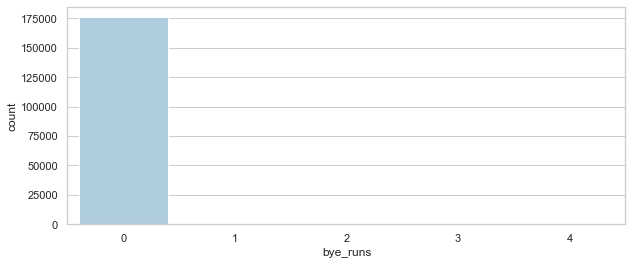

In [239]:
sns.countplot(df['bye_runs'])

In [241]:
df['legbye_runs'].unique()

array([0, 1, 2, 5, 3, 4], dtype=int64)

In [243]:
df['noball_runs'].unique()

array([0, 1, 2, 5, 3], dtype=int64)

In [246]:
df['penalty_runs'].unique()

array([0, 5], dtype=int64)

In [249]:
df['batsman_runs'].unique()

array([0, 4, 1, 6, 3, 2, 5, 7], dtype=int64)

In [252]:
df['extra_runs'].unique()

array([0, 2, 1, 4, 5, 3, 7], dtype=int64)

In [254]:
df['total_runs'].unique()

array([ 0,  4,  2,  1,  6,  3,  5,  7, 10,  8], dtype=int64)

In [256]:
df['month'] = df['date'].dt.month

### Bivariate Analysis 

In [261]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'month'],
      dtype='object')

### 1- Top 4 Cities That Chennai Super Kings Team Play Mathes ?

In [270]:
top4 = df[df['team1'] == 'Chennai Super Kings']['city'].value_counts().head(4)
top4

Chennai    8330
Mumbai     1459
Pune       1230
Kolkata    1140
Name: city, dtype: int64

<AxesSubplot:xlabel='city', ylabel='count'>

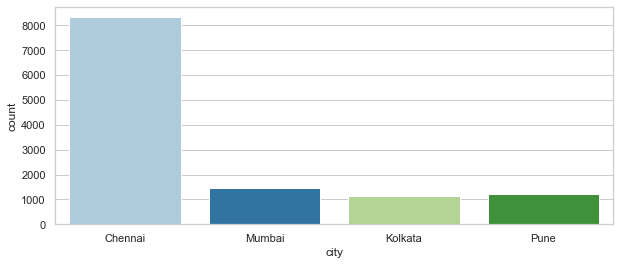

In [272]:
sns.countplot(data = df[(df['team1'] == 'Chennai Super Kings') & df['city'].isin(top4.index)] , x = 'city')

### 2- In Which Month Mumbai Indians Team Play Most ?

In [274]:
df[df['team1'] == 'Mumbai Indians']['month'].value_counts()

4     10401
5     10182
3      1706
12      493
6       479
2       249
7       246
9       234
Name: month, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

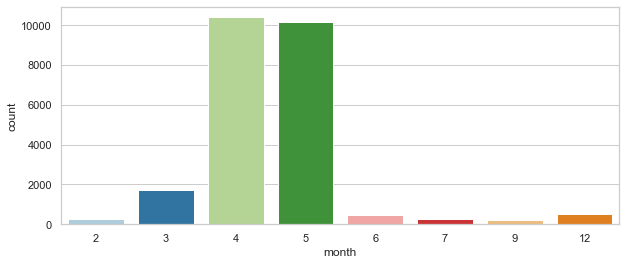

In [275]:
sns.countplot(data = df[df['team1'] == 'Mumbai Indians'] , x = 'month')

### 3- What Is Most Teams Beat Mumbai Indian Team ?

In [284]:
cnt = df[df['team1'] == 'Mumbai Indians']['winner'].value_counts()[1:]
cnt

Rajasthan Royals               1899
Delhi Daredevils               1662
Chennai Super Kings            1207
Kings XI Punjab                 958
Royal Challengers Bangalore     956
Sunrisers Hyderabad             953
Kolkata Knight Riders           709
Gujarat Lions                   487
Rising Pune Supergiant          247
Kochi Tuskers Kerala            247
Rising Pune Supergiants         218
Deccan Chargers                 202
Name: winner, dtype: int64

<AxesSubplot:xlabel='count', ylabel='winner'>

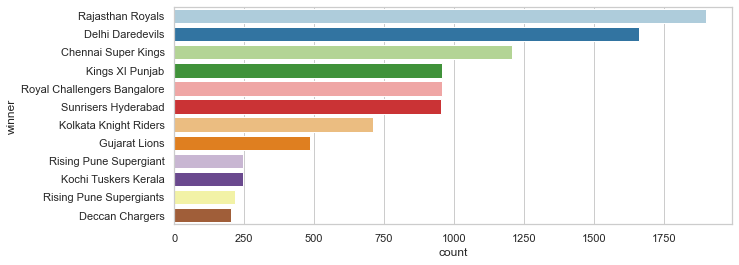

In [286]:
sns.countplot(data = df[df['team1'] == 'Mumbai Indians'] , y = 'winner' , order = cnt.index)

### 4- In Which Season Mumbai Indians Win Most ?

In [291]:
cnt = df[df['winner'] == 'Mumbai Indians']['season'].value_counts()
cnt 

2013    3173
2017    2888
2010    2704
2019    2671
2015    2457
2012    2443
2011    2416
2014    1685
2016    1684
2008    1509
2018    1470
2009    1205
Name: season, dtype: int64

<AxesSubplot:>

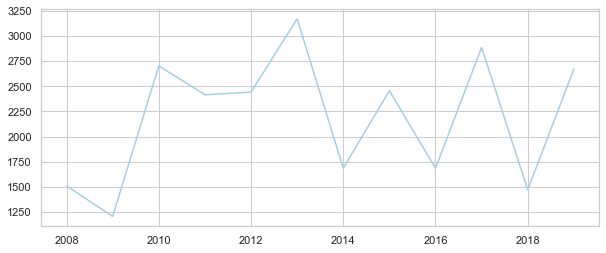

In [292]:
sns.lineplot(x = cnt.index, y = cnt.values)

### 5- How Many Times When The Team Is The Winner & Toss Winner ? 

In [299]:
df['dummy'] = 1

In [401]:
pivt = pd.pivot_table(data = df , values = 'dummy' , index = 'winner' , columns = 'toss_winner' , aggfunc = sum)
pivt

toss_winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
winner,,,,,,,,,,,,,,,
Chennai Super Kings,13735.0,483.0,469.0,1221.0,NaN,697.0,NaN,1356.0,981.0,738.0,2199.0,NaN,NaN,739.0,984.0
Deccan Chargers,244.0,4624.0,NaN,NaN,NaN,482.0,228.0,199.0,NaN,NaN,243.0,NaN,NaN,993.0,NaN
Delhi Capitals,NaN,NaN,1473.0,NaN,NaN,NaN,NaN,NaN,246.0,NaN,224.0,NaN,NaN,NaN,241.0
Delhi Daredevils,952.0,1171.0,NaN,8117.0,NaN,738.0,NaN,959.0,1468.0,469.0,619.0,226.0,NaN,741.0,NaN
Gujarat Lions,NaN,NaN,NaN,242.0,2342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,246.0,NaN
Kings XI Punjab,1260.0,741.0,245.0,1601.0,490.0,8049.0,NaN,1464.0,2162.0,198.0,1241.0,NaN,237.0,1296.0,245.0
Kochi Tuskers Kerala,NaN,NaN,NaN,NaN,NaN,NaN,830.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kolkata Knight Riders,934.0,743.0,NaN,1183.0,NaN,1941.0,NaN,12398.0,725.0,NaN,952.0,NaN,142.0,1151.0,1475.0
Mumbai Indians,1710.0,979.0,NaN,2123.0,263.0,1466.0,NaN,1711.0,13409.0,715.0,1491.0,NaN,NaN,1506.0,932.0


###### take alook on the diagonal :)

<AxesSubplot:xlabel='toss_winner', ylabel='winner'>

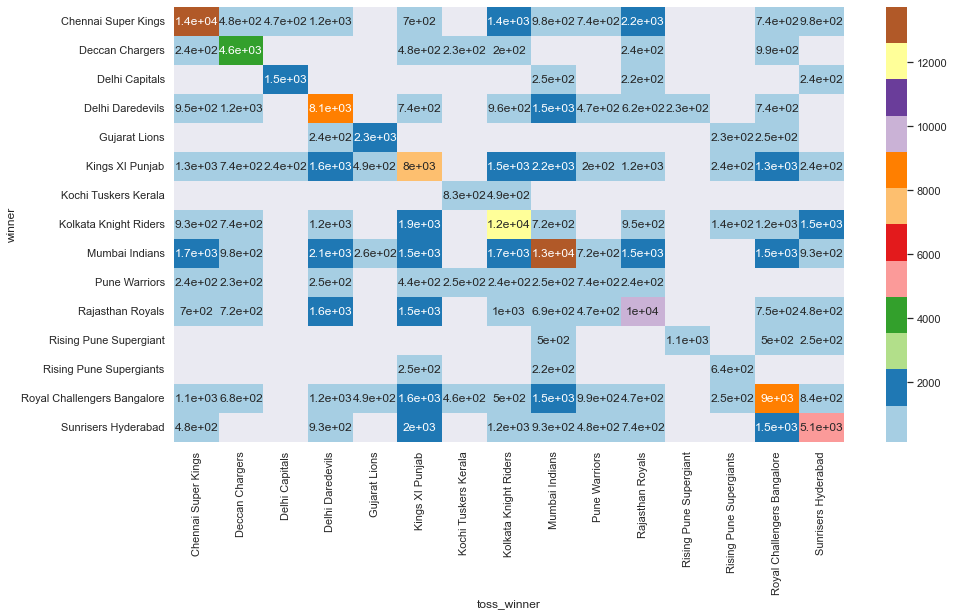

In [305]:
sns.set_theme(rc = {'figure.figsize' : (15 , 8)})
sns.heatmap(pivt , annot = True, cmap = 'Paired')

In [315]:
sns.set_theme(context = 'notebook' , style = 'whitegrid'  , palette = 'Paired' , rc = {'figure.figsize' : (10 , 4)})

### 6- For Gujarat Lions Team Which Player Take Player Of The Match Most ? 

In [316]:
df[df['winner'] == 'Gujarat Lions']['player_of_match'].value_counts()

AJ Finch     717
DR Smith     710
SK Raina     468
AJ Tye       448
V Kohli      246
CH Morris    242
P Kumar      232
Name: player_of_match, dtype: int64

<AxesSubplot:xlabel='player_of_match', ylabel='count'>

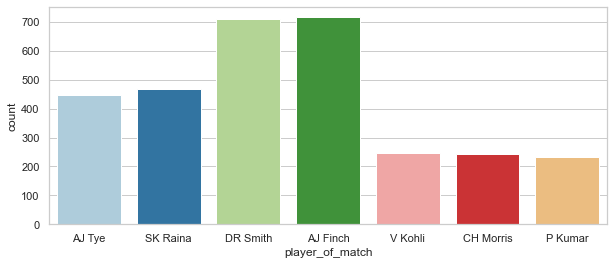

In [317]:
sns.countplot(data = df[df['winner'] == 'Gujarat Lions'] , x = 'player_of_match')

### 7- For Season (16) Which Venue Take Matches Most ?

In [328]:
df[df['season'] == 2016]['venue'].value_counts().to_frame()

,venue
M Chinnaswamy Stadium,2147
"Punjab Cricket Association IS Bindra Stadium, Mohali",1682
Feroz Shah Kotla,1674
"Rajiv Gandhi International Stadium, Uppal",1630
Eden Gardens,1553
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,1378
Saurashtra Cricket Association Stadium,1170
Maharashtra Cricket Association Stadium,990
Wankhede Stadium,939
Shaheed Veer Narayan Singh International Stadium,483


<AxesSubplot:xlabel='count', ylabel='venue'>

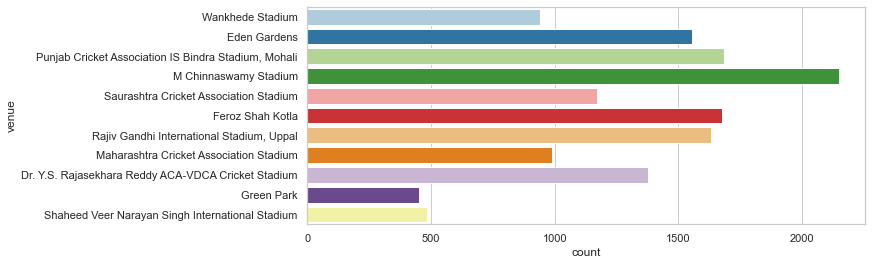

In [330]:
sns.countplot(data = df[df['season'] == 2016] , y = 'venue')

### 8- For Asad Rauf Umpire, Which Teams He Was An Umpire For It Most For Each Season ?

In [345]:
df[df['umpire1'] == 'Asad Rauf'][['season' , 'team1']].value_counts()

season  team1                      
2013    Mumbai Indians                 982
        Kolkata Knight Riders          958
2008    Kolkata Knight Riders          835
        Deccan Chargers                731
2011    Pune Warriors                  724
        Deccan Chargers                720
2012    Chennai Super Kings            697
2011    Chennai Super Kings            668
        Royal Challengers Bangalore    500
        Mumbai Indians                 491
2013    Sunrisers Hyderabad            484
2011    Kings XI Punjab                483
2013    Pune Warriors                  481
2012    Pune Warriors                  473
2013    Royal Challengers Bangalore    253
2012    Mumbai Indians                 249
        Royal Challengers Bangalore    249
        Kolkata Knight Riders          247
        Rajasthan Royals               246
        Kings XI Punjab                243
2011    Kolkata Knight Riders          241
        Delhi Daredevils               226
2008    Kings XI P

<AxesSubplot:xlabel='season', ylabel='count'>

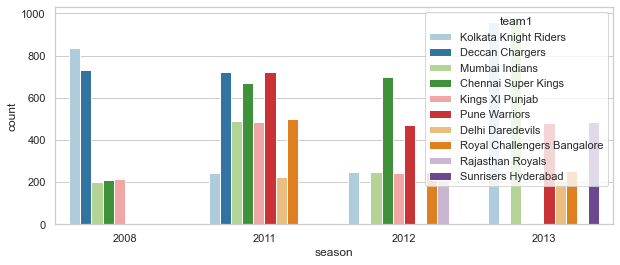

In [348]:
sns.countplot(data = df[df['umpire1'] == 'Asad Rauf'] , x = 'season' , hue = 'team1')

### 9- For Each Winning Team What Is Total Inning In Season 2015?

In [357]:
df[df['season'] == 2015].groupby(['winner'])['inning'].agg([np.sum])

,sum
winner,
Chennai Super Kings,3641
Delhi Daredevils,1752
Kings XI Punjab,967
Kolkata Knight Riders,2520
Mumbai Indians,3664
Rajasthan Royals,2615
Royal Challengers Bangalore,2273
Sunrisers Hyderabad,2465


<AxesSubplot:xlabel='inning', ylabel='winner'>

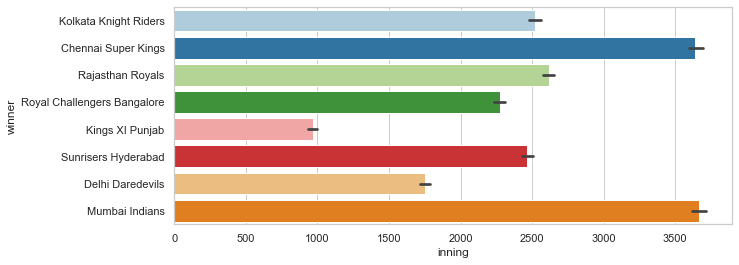

In [358]:
sns.barplot(data = df[df['season'] == 2015] , y = 'winner' , x = 'inning' , estimator = np.sum)

### 10- Total Wide Run For Each Season For Mumbai Indians Team ?

In [374]:
df[df['team1'] == 'Mumbai Indians'].groupby(['season'])['wide_runs'].sum()

season
2008     47
2009     95
2010    121
2011     75
2012     41
2013     99
2014     60
2015    104
2016     53
2017     63
2018     77
2019     68
Name: wide_runs, dtype: int64

<AxesSubplot:xlabel='season', ylabel='wide_runs'>

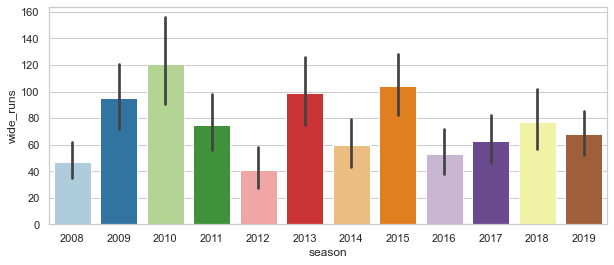

In [375]:
sns.barplot(data = df[df['team1'] == 'Mumbai Indians'] , x = 'season' , y = 'wide_runs' , estimator = np.sum)

### 11- Total  Bye Runs For Each Season For Mumbai Indians Team ?

In [402]:
df[df['team1'] == 'Mumbai Indians'].groupby(['season'])['bye_runs'].sum()

season
2008    17
2009    11
2010    10
2011    14
2012     2
2013    17
2014     5
2015     6
2016     9
2017     8
2018     9
2019    14
Name: bye_runs, dtype: int64

<AxesSubplot:xlabel='season', ylabel='bye_runs'>

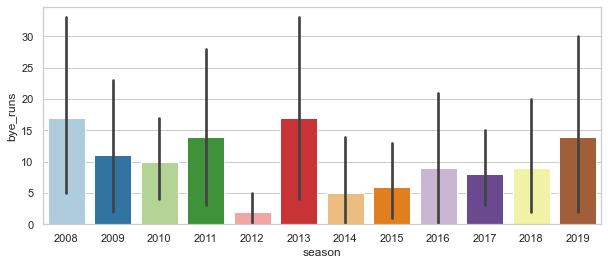

In [403]:
sns.barplot(data = df[df['team1'] == 'Mumbai Indians'] , x = 'season' , y = 'bye_runs' , estimator = np.sum)

### 12- Total Legbye Runs For Each Season For Mumbai Indians Team ?

In [404]:
df[df['team1'] == 'Mumbai Indians'].groupby(['season'])['legbye_runs'].sum()

season
2008    45
2009    48
2010    62
2011    49
2012    30
2013    45
2014    47
2015    39
2016    35
2017    41
2018    37
2019    43
Name: legbye_runs, dtype: int64

<AxesSubplot:xlabel='season', ylabel='legbye_runs'>

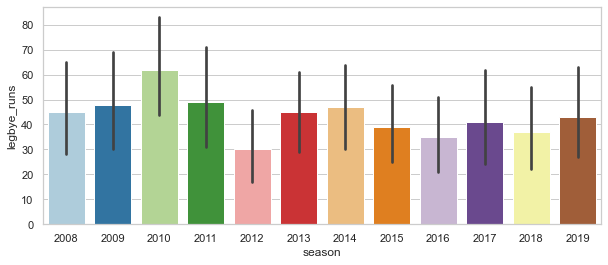

In [405]:
sns.barplot(data = df[df['team1'] == 'Mumbai Indians'] , x = 'season' , y = 'legbye_runs' , estimator = np.sum)

### 13- Total Noball Runs For Each Season For Mumbai Indians Team ?

In [406]:
df[df['team1'] == 'Mumbai Indians'].groupby(['season'])['noball_runs'].sum()

season
2008    10
2009    10
2010    18
2011     4
2012     7
2013    11
2014     6
2015    19
2016     8
2017     2
2018     8
2019     8
Name: noball_runs, dtype: int64

<AxesSubplot:xlabel='season', ylabel='noball_runs'>

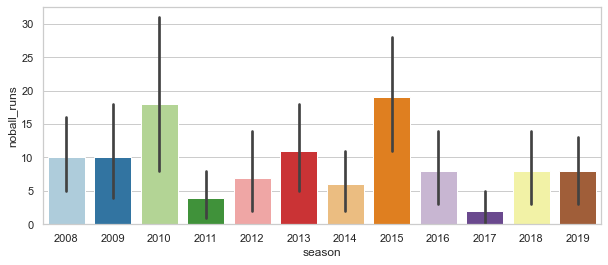

In [407]:
sns.barplot(data = df[df['team1'] == 'Mumbai Indians'] , x = 'season' , y = 'noball_runs' , estimator = np.sum)

### 14- Total Penalty Runs For Each Season For Mumbai Indians Team ?

In [408]:
df[df['team1'] == 'Mumbai Indians'].groupby(['season'])['penalty_runs'].sum()

season
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    5
2015    0
2016    0
2017    0
2018    0
2019    0
Name: penalty_runs, dtype: int64

<AxesSubplot:xlabel='season', ylabel='penalty_runs'>

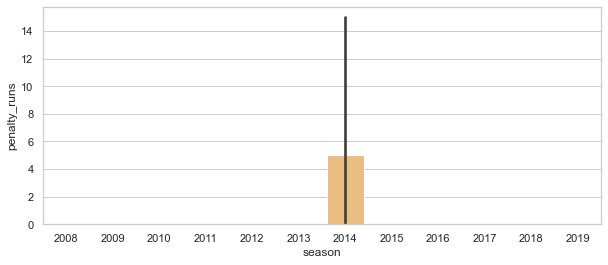

In [409]:
sns.barplot(data = df[df['team1'] == 'Mumbai Indians'] , x = 'season' , y = 'penalty_runs' , estimator = np.sum)

### 15- Total Batsman Runs For Each Season For Mumbai Indians Team ?

In [410]:
df[df['team1'] == 'Mumbai Indians'].groupby(['season'])['batsman_runs'].sum()

season
2008    1793
2009    2176
2010    3325
2011    2225
2012    1658
2013    3157
2014    2094
2015    3301
2016    2000
2017    1677
2018    3111
2019    3156
Name: batsman_runs, dtype: int64

<AxesSubplot:xlabel='season', ylabel='batsman_runs'>

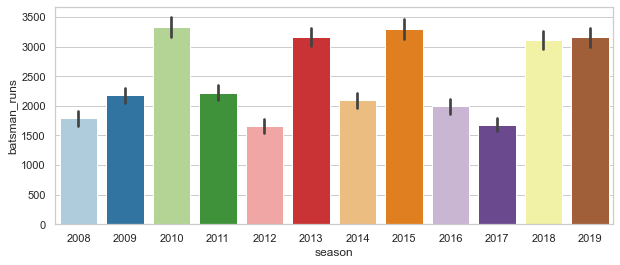

In [411]:
sns.barplot(data = df[df['team1'] == 'Mumbai Indians'] , x = 'season' , y = 'batsman_runs' , estimator = np.sum)

### 16- Total Extra Runs For Each Season For Mumbai Indians Team ?

In [413]:
cnt = df[df['team1'] == 'Mumbai Indians'].groupby(['season'])['extra_runs'].sum()
cnt

season
2008    119
2009    164
2010    211
2011    142
2012     80
2013    172
2014    123
2015    168
2016    105
2017    114
2018    131
2019    133
Name: extra_runs, dtype: int64

<AxesSubplot:xlabel='season'>

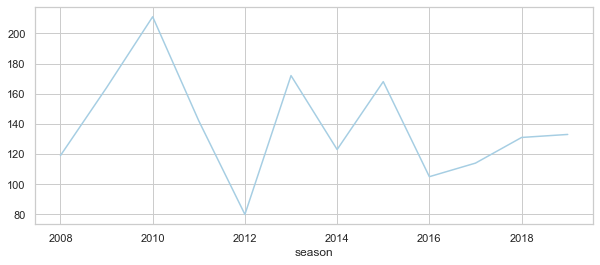

In [414]:
sns.lineplot(x = cnt.index , y = cnt.values)

In [399]:
#df.to_csv('Indian Premier League.csv' , index = False)